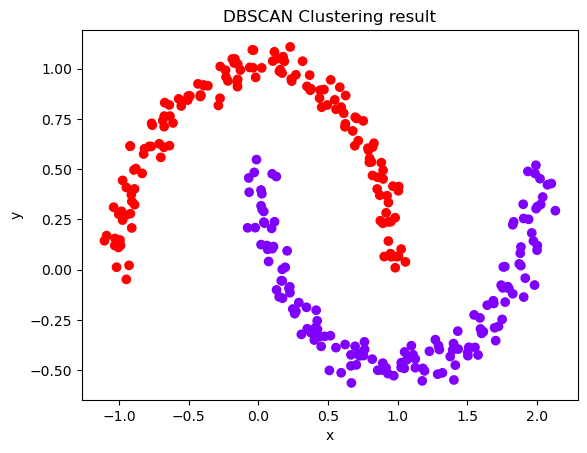

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# 예제 데이터 생성
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# DBSCAN 적용
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='rainbow')
plt.title("DBSCAN Clustering result")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [19]:
dbscan.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [20]:
import numpy as np
np.unique(dbscan.labels_)

array([0, 1])

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


# 1. 데이터 준비
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['target'] = iris.target

iris_dbscan = DBSCAN(eps=0.6, min_samples=10, metric='euclidean')
dbscan_labels = iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [39]:
iris_df.groupby(['target'])['dbscan_cluster'].value_counts()


target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                32
        -1                18
Name: count, dtype: int64

In [40]:
cluster_labels = -1 # 잡음점

In [41]:
cluster_labels

-1

In [71]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*', 'P', 'D', 'v']
    isNoise = False

    # 클러스터 중심이 있는 경우만 처리
    if iscenter and hasattr(clusterobj, 'clustercenters'):
        centers = clusterobj.clustercenters
    else:
        iscenter = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        # noise(-1) 여부 확인
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = f'Cluster {label}'

        marker_style = markers[label % len(markers)] if label != -1 else 'X'

        # 클러스터 점 찍기
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                    s=70, edgecolor='k', marker=marker_style, label=cluster_legend)

        # 중심 표시
        if iscenter and label != -1:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        edgecolor='k', alpha=0.9, marker=marker_style)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker=f'${label}$')

    plt.legend(loc='upper center' if isNoise else 'upper right')
    plt.title(f"Clustering result: {label_name}")
    plt.xlabel("ftr1 (PCA 1)")
    plt.ylabel("ftr2 (PCA 2)")
    plt.grid(True)
    plt.show()

In [170]:
# 1. 데이터 준비
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['target'] = iris.target

iris_dbscan = DBSCAN(eps=0.6, min_samples=5, metric='euclidean')
dbscan_labels = iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
iris_df['ftr1']=pca_transformed[:, 0]
iris_df['ftr2']=pca_transformed[:, 1]

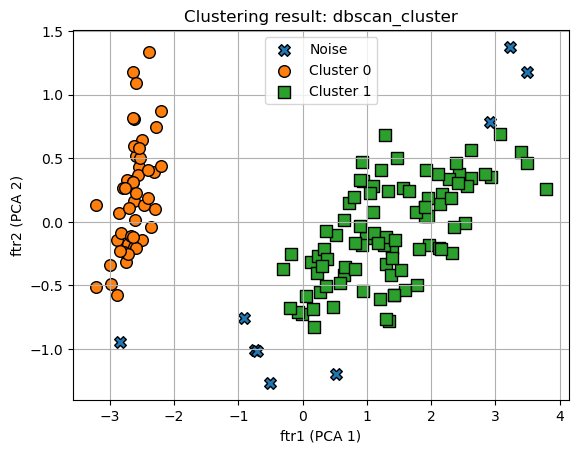

In [172]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

In [54]:
#하이퍼파라미터 튜닝으로 잡음점 줄이기